In [28]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [29]:
off = pd.read_excel('./데이터프레임/아이디어스_오프라인.xlsx')
off.head()

,category,title,datetime,review,star
0,캔들/발향,향기로운 플라워타블렛과 섬유향수만들기,2021년 5월 11일,작년에 지인과 같이 3번의 수업을하고 올해는 혼자 처음으로 받았는데 한결같이 친절하...,5.0
1,캔들/발향,향기로운 플라워타블렛과 섬유향수만들기,2021년 4월 24일,작가님이 정말 친절하게 알려주셨어요 혼자 갔는데 너무 편안하게 대해주셔서 재미있었습...,5.0
2,캔들/발향,향기로운 플라워타블렛과 섬유향수만들기,2021년 4월 7일,작가님이 친절하게 잘 안내해 주셔서 향기롭고 행복한 시간이 된 것 같습니다 작품도 ...,5.0
3,캔들/발향,향기로운 플라워타블렛과 섬유향수만들기,2021년 3월 27일,"직접 원하는 디자인과 향을 골라서 만들수있고, 타블렛이랑 섬유향수 모두 만들 수 있...",5.0
4,캔들/발향,향기로운 플라워타블렛과 섬유향수만들기,2021년 3월 25일,"선생님께서 정말 친절하셨구, 자유도가 높은 수업이다보니 만족도도 높은 것 같아요원하...",5.0


In [30]:
off.isnull().sum()

category      0
title         0
datetime    246
review      254
star        246
dtype: int64

In [31]:
print('전체 학습데이터의 개수: {}'.format(len(off)))

전체 학습데이터의 개수: 1135


In [32]:
review_length = off['review'].astype(str).apply(len)
review_length.head()

0    193
1    131
2     90
3    113
4    121
Name: review, dtype: int64

In [38]:
review_length.value_counts()

88     11
82     10
46     10
81      9
44      9
       ..
260     1
257     1
250     1
248     1
1       1
Name: review, Length: 327, dtype: int64

In [33]:
# 리뷰 없는 것 제거
null= off[off.review !=off.review].index
off.drop(null, inplace=True)

In [35]:
off.isnull().sum()

category    0
title       0
datetime    0
review      0
star        0
dtype: int64

Text(0, 0.5, 'Number of review')

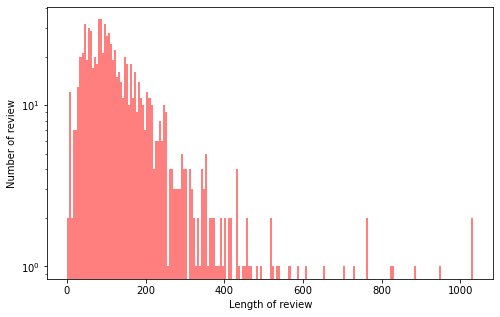

In [36]:
# 그래프에 대한 이미지 사이즈 선언
plt.figure(figsize=(8, 5))
plt.hist(review_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip') 

# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review') # comment가 없는게 제일 많음

In [37]:
print('리뷰 길이 최대 값: {}'.format(np.max(review_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(review_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(review_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(review_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(review_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(review_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(review_length, 75)))

리뷰 길이 최대 값: 1033
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 148.78
리뷰 길이 표준편차: 126.93
리뷰 길이 중간 값: 112.0
리뷰 길이 제 1 사분위: 71.0
리뷰 길이 제 3 사분위: 186.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d6fda34640>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6fd7e6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6fd30ed30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6fd7e69a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6fda3c040>],
 'means': [<matplotlib.lines.Line2D at 0x1d6fd7e6ca0>]}

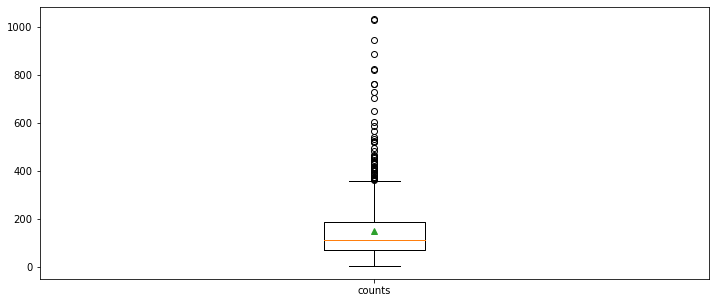

In [15]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(review_length,
             labels=['counts'],
             showmeans=True) # 길이가 긴 데이터가 꽤 있음

In [16]:
train_review = [review for review in off['review'] if type(review) is str] # str 아닌 것 제거

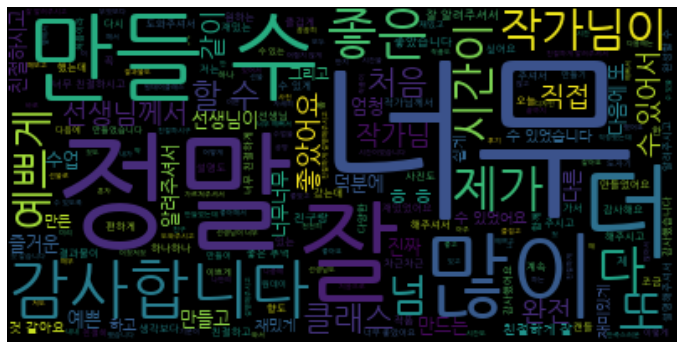

In [17]:
wordcloud = WordCloud(font_path ='NanumGothic.ttf').generate(' '.join(off.review))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation = 'bilinear') # 글자의 배열 형태를 bilinear로 지정, 2개의 선??
plt.axis('off') # x, y 축 나오지 않게하기
plt.show() # 불용어 사전 쓰기 전

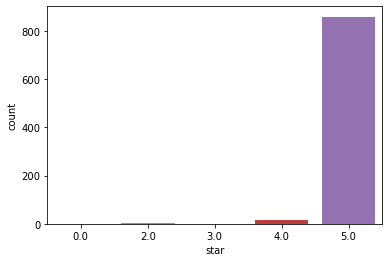

In [18]:
sns.countplot(off['star'])

In [19]:
off.star.value_counts()

5.0    860
4.0     16
2.0      3
3.0      1
0.0      1
Name: star, dtype: int64

In [23]:
off[off.star ==2].review.values

array(['반지만드는데에만 집중하니 잡생각이 안나서 좋더라구요',
       '쉽고 간편해서 좋았지만..아쉬움이 많기는 하네요한글도안을 준비해서 갔는데 노력대비 안 이쁘다고 비추 하셔서 가지고 있는 도안으로 했는데 이쁘네요손님이 한꺼번에 와서 정신없어 보여서 그런지 설명도 부족한 부분이 있는거 같이 느껴졌어요색 추가하고 남은 네온이 있으시면 추가로 가능한데 꼭..자르지 마세요 ㅎㅎ 전 설명을 못 듣고 제 맘대로 잘랐는데 그게 끝이라고 하네요 ㅎㅎㅎ허허...',
       '2월에 다녀왔는데 후기 안쓰려다가 씁니다. 친구랑 다녀왔어요 불과 두세달만에 제 친구 접시는 전자레인지에 10초 넣엇다고 반토막낫구요 저는 나뭇잎 장식 하나 떨어졋네요클래스 하실때 하나하나 봐주시는거 까진 안바래요. 도자기 꾸미는 시간을 얼마준다 이런 말씀도 안하시고 갑자기 시간 촉박하다 라고 말로만 재촉하시고.. 접시 만드는 내내 핸드폰만 보시고 굽고 나서 보니까 장식부분 제가 잘 못매꿧는지 좀 떳엇고 제친구한테는 접시 금갓어요 라고 하시던데 저희가 전문가가 아닌데 이게 뜰지 갈라질지 어떻게 아나요 접시 완성햇을때는 금간게 하나도 없엇어요.이런 부분이 잇지 않도록 하시는게 선생님 역할이 아닌가요..왜 후기가 하나도 없는지 이제 알겟네요.'],
      dtype=object)

In [24]:
off[off.star ==3].review.values # 그런데 3점....

array(['친절하게 잘 가르쳐 주셔서 제가 레진 아트 목걸이 예쁘게 만들수 있었어요 '], dtype=object)

In [25]:
word_counts = off['review'].astype(str).apply(lambda x:len(x.split(' '))) # 어절 분리

Text(0, 0.5, 'Number of reviews')

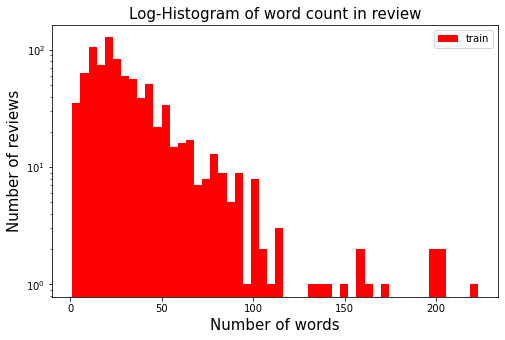

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(word_counts, bins=50, color='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [27]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(word_counts, 75)))# 최대 단어 개수를 6, 7개

리뷰 단어 개수 최대 값: 223
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 32.87
리뷰 단어 개수 표준편차: 27.84
리뷰 단어 개수 중간 값: 25.0
리뷰 단어 개수 제 1 사분위: 15.0
리뷰 단어 개수 제 3 사분위: 42.0
